In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ufi.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vfl.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/sohu.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/rdcm.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/virt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/hylb.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/skt.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/asix.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/mac.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/gut.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ngs.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/vpg.us.txt
/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ibtx.us.txt
/kaggle/input/price-volume-data-for-all-us-st

In [2]:
df = pd.read_csv("/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks/ufi.us.txt")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     3201 non-null   object 
 1   Open     3201 non-null   float64
 2   High     3201 non-null   float64
 3   Low      3201 non-null   float64
 4   Close    3201 non-null   float64
 5   Volume   3201 non-null   int64  
 6   OpenInt  3201 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 175.2+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3201.0
mean,16.299971,16.599922,15.985184,16.322927,7.681135e+04,0.0
std,9.303375,9.396464,9.216595,9.319678,9.812050e+04,0.0
min,1.410000,1.620000,1.320000,1.410000,5.000000e+02,0.0
25%,8.730000,8.940000,8.500000,8.700000,3.684000e+04,0.0
50%,12.310000,12.570000,12.030000,12.330000,5.848500e+04,0.0
75%,25.830000,26.240000,25.460000,25.900000,8.858800e+04,0.0
max,38.960000,39.210000,37.615000,38.860000,3.029235e+06,0.0


In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,12.09,13.20,12.06,13.08,318399,0
1,2005-02-28,13.05,13.32,12.27,12.57,33966,0
2,2005-03-01,12.60,12.78,12.09,12.66,42066,0
3,2005-03-02,12.90,13.62,12.75,13.50,81666,0
4,2005-03-03,13.65,13.65,12.60,12.78,100299,0


In [6]:
#to look at more information about the dataset
df.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,12.09,13.20,12.06,13.08,318399,0
1,2005-02-28,13.05,13.32,12.27,12.57,33966,0
2,2005-03-01,12.60,12.78,12.09,12.66,42066,0
3,2005-03-02,12.90,13.62,12.75,13.50,81666,0
4,2005-03-03,13.65,13.65,12.60,12.78,100299,0
5,2005-03-04,12.90,13.26,12.54,12.81,36533,0
6,2005-03-07,12.81,13.47,12.81,13.08,18766,0
7,2005-03-08,13.08,13.14,12.54,13.02,15699,0
8,2005-03-09,12.93,13.26,12.72,12.75,18599,0
9,2005-03-10,12.78,12.96,12.48,12.81,22699,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


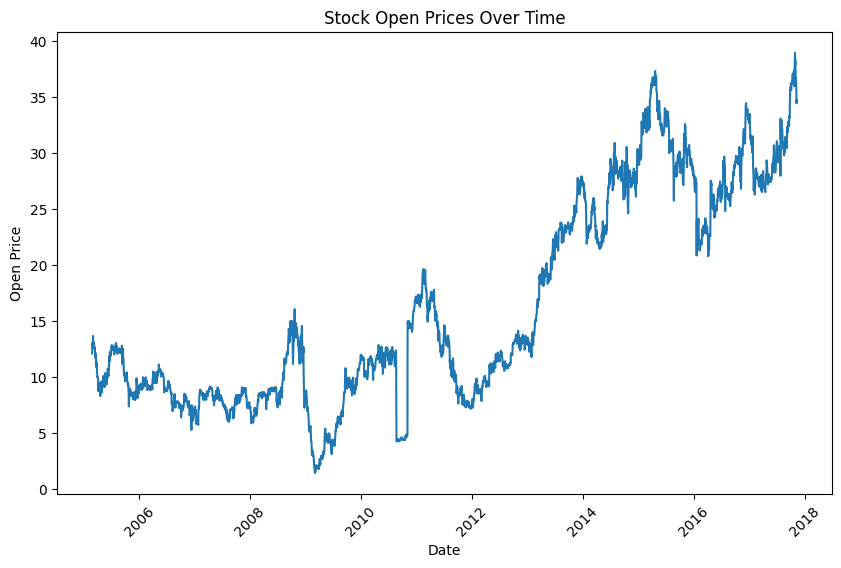

In [7]:
#visualEDA
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date column to datetime format for proper plotting
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Open', data=df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.title('Stock Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()


In [8]:
#The sharp decline in stock prices in 2009 was likely driven by the aftermath of the 2008 global financial crisis. This period, often referred to as the housing market crash, saw the collapse of the U.S. housing bubble and led to significant losses in stock markets worldwide. 

#In 2011, another market downturn occurred, fueled by a combination of factors including the European debt crisis and the downgrade of the U.S. credit rating. The growing fears of Greece defaulting on its debt caused instability in the Eurozone, further exacerbating the market decline. Together, these economic shocks led to another sharp drop in stock prices during that year.

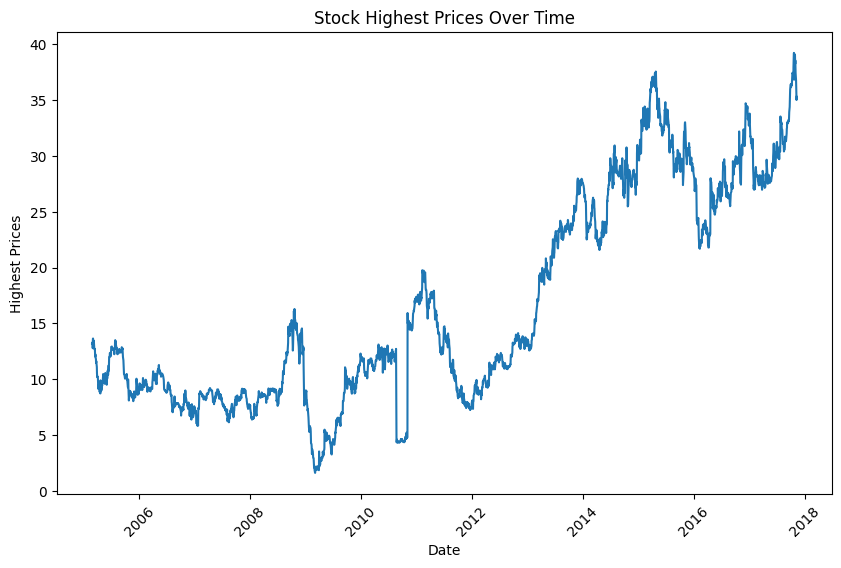

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import warnings module


warnings.filterwarnings('ignore')
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='High', data=df)
plt.xticks(rotation=45)
plt.title('Stock Highest Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Highest Prices')

plt.show()


In [10]:
#It seems like both highest and open graphs looks about the same. 
#This suggests that the opening and highest prices of the stock are closely related, which is common in many stocks.

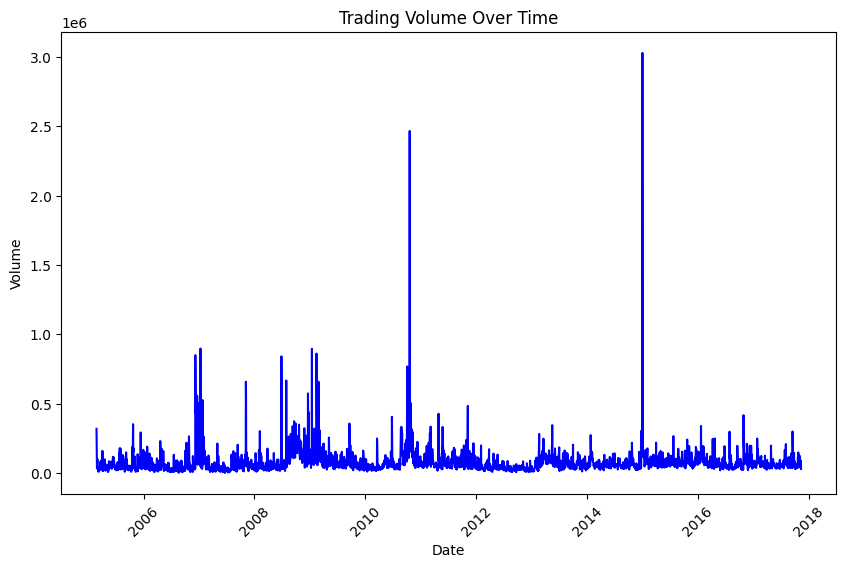

In [11]:
#Now let's see the relationship between Date-Volume
#I'm hoping to see periods of high or low trading activity

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Volume', data=df, color='blue')
plt.xticks(rotation=45)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [12]:
# Now with this graph we can assume that:
# Sudden spikes in volume in 2011 and 2015 may indicate moments of increased market interest,
#potentially due to news, earnings reports, or economic events

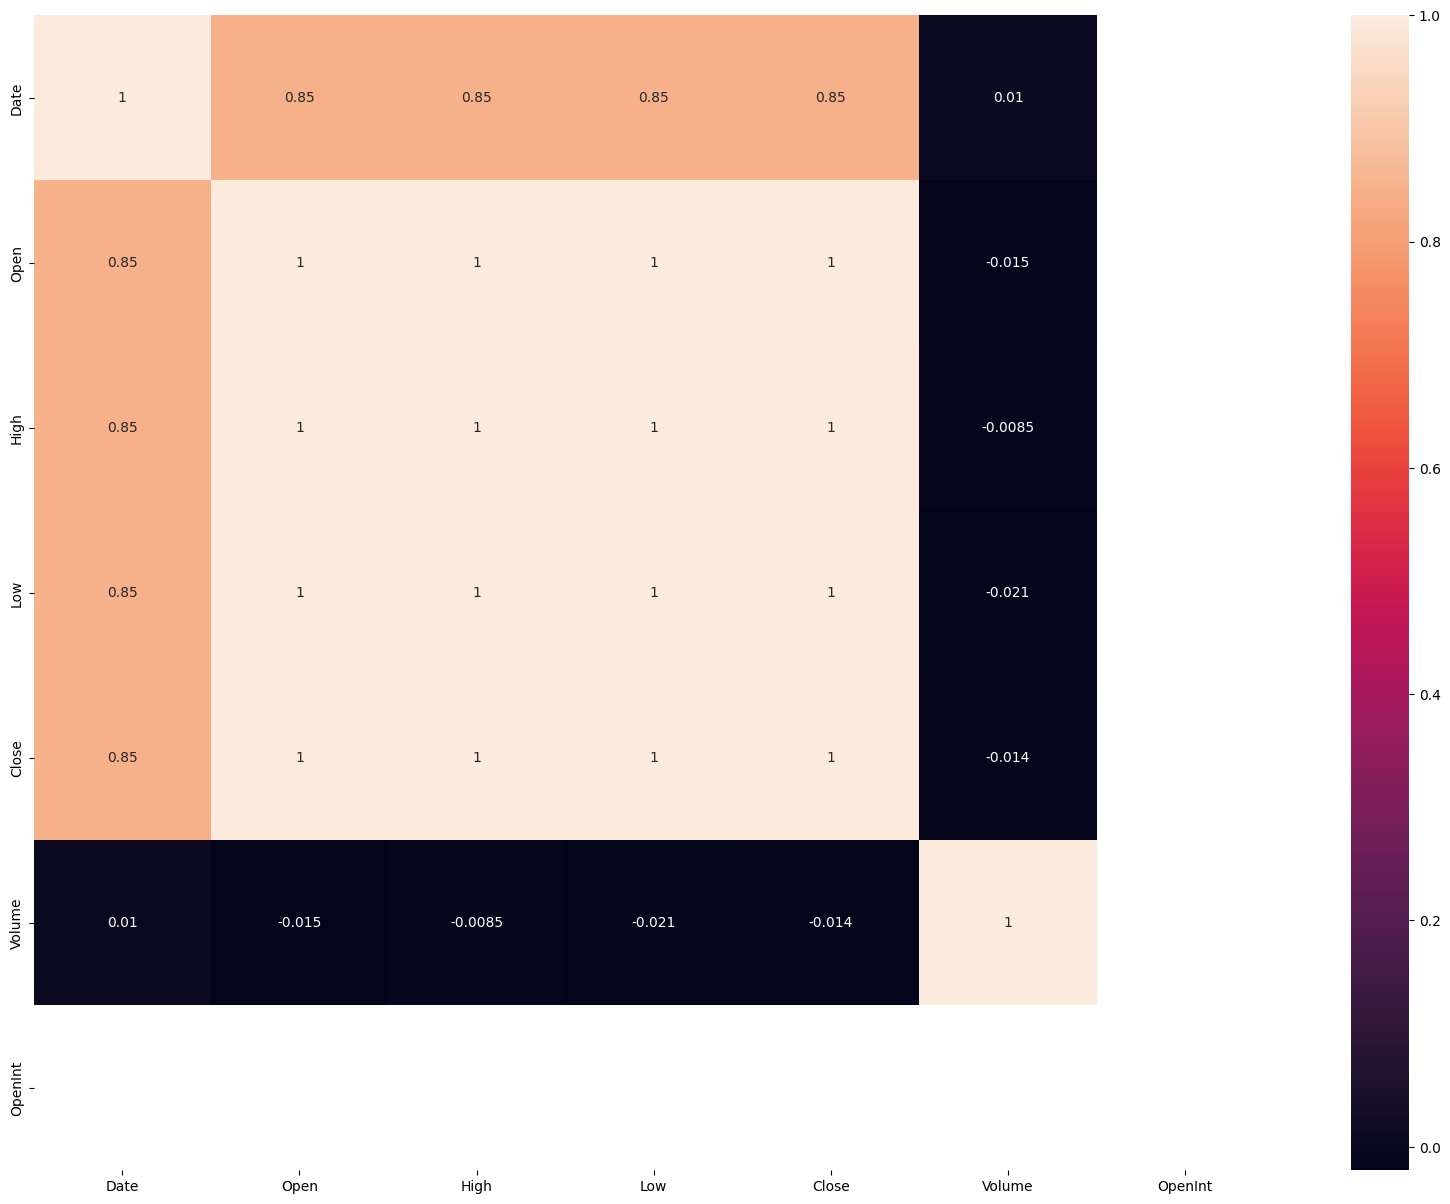

In [13]:
#data preprocessing part
corr_matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [14]:
# now we're in the correlation part...
#since my goal is predict stock market ups and downs,
#the "Close" column would be the most appropriate choice to serve as my target variable 
#Because of course: 
#The "Close" price represents the final price of the stock at the end of each trading day and can reflect market trends.

In [15]:
cor_target = abs(corr_matrix["Close"])


relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)

Date     0.846829
Open     0.998965
High     0.999597
Low      0.999442
Close    1.000000
Name: Close, dtype: float64


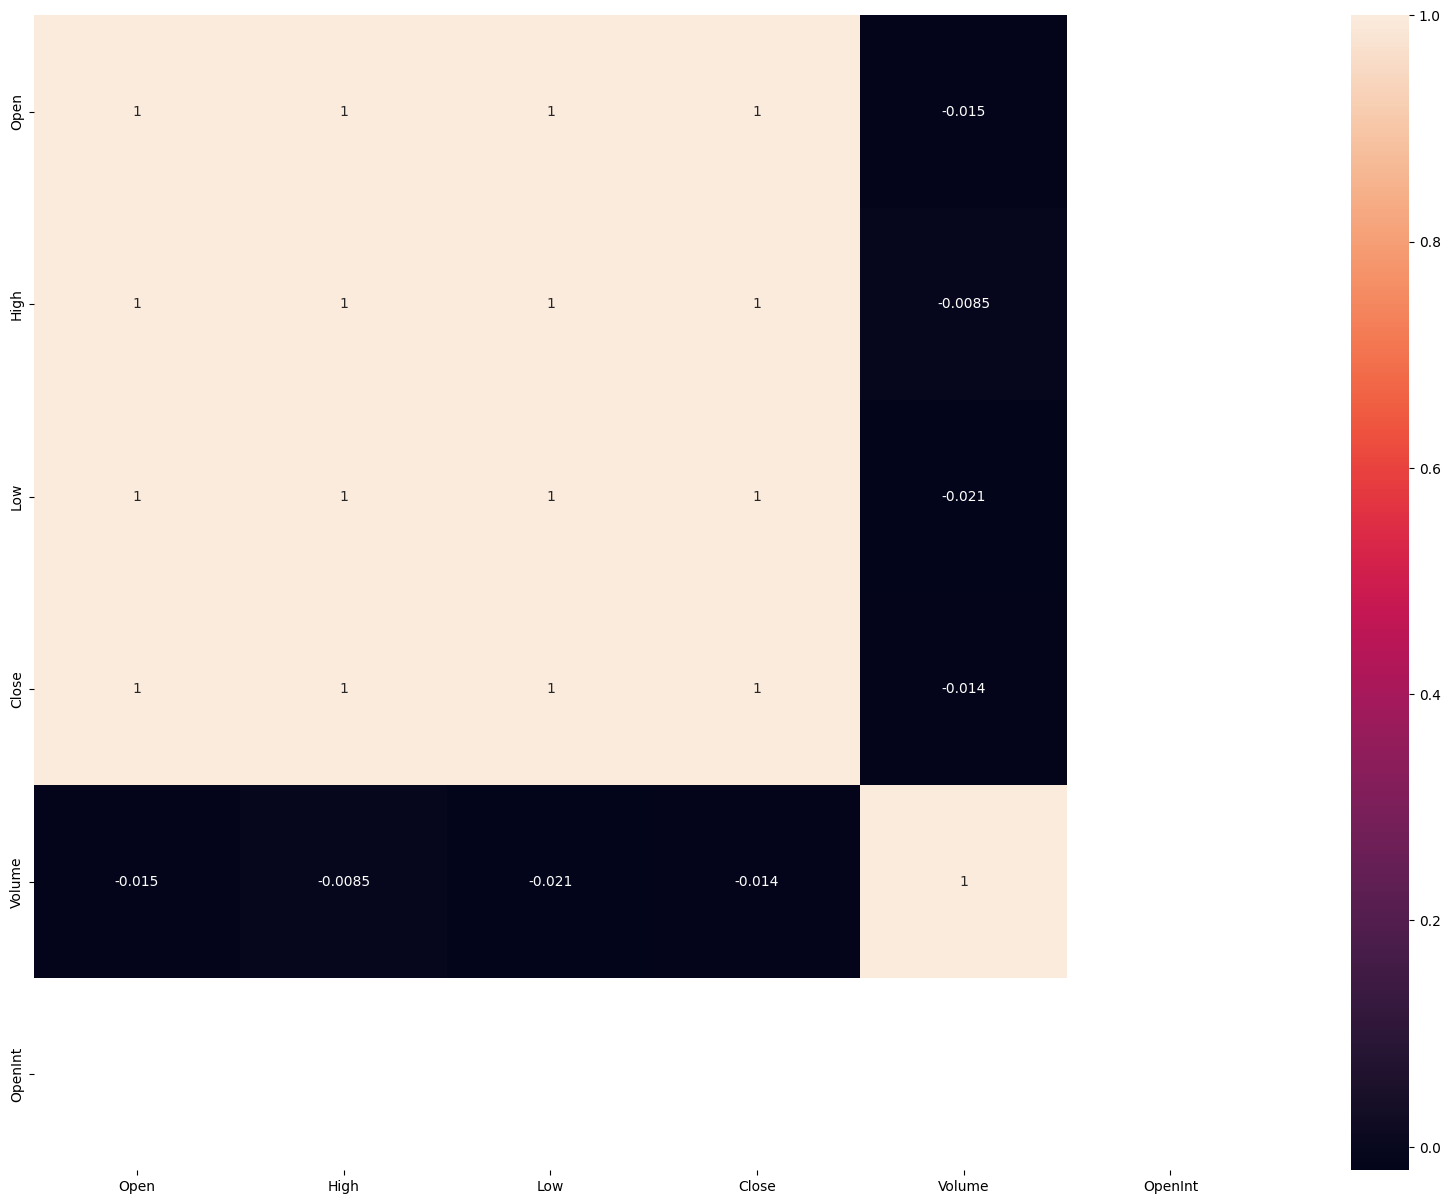

Open     0.998965
High     0.999597
Low      0.999442
Close    1.000000
Name: Close, dtype: float64


In [16]:
#  In this section, I realized that I should just drop Date(since it's not a numerical variable)
df_cleaned = df.drop(columns=["Date"])
corr_matrix = df_cleaned.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)
plt.show()
cor_target = abs(corr_matrix["Close"])
relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)


In [17]:
# and also the target variable, "Close"
to_drop = cor_target[cor_target<0.1]

In [18]:
# after converting these variables into a list,
#I added "Close" and finalized my dataset with the appropriate features (X) and target (y) for training my machine learning model.

to_drop_frame = to_drop.to_frame()
row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append('Close') 
y = df['Close'].values  
X = df.drop(row_names_list, axis=1).values  


In [19]:
#normalization process and dividing the dataset into test and train data

In [20]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Assuming `df` is your DataFrame with datetime handling already applied
# Example: Drop 'Date' column if present
df.drop(["Date"], axis=1, inplace=True)

# Check if 'Close' is being used as a binary classification target
# If 'Close' is continuous, you might need to binarize or choose a regression approach instead
y = df["Close"].apply(lambda x: 1 if x > df["Close"].median() else 0).values  # Binarizing for classification
X = df.drop("Close", axis=1).values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Define pipeline steps
steps = [('scaler', StandardScaler()),
         ('dec_tree', DecisionTreeClassifier())]
pipeline = Pipeline(steps)

# Parameters for GridSearchCV
params = {"dec_tree__criterion": ['gini', 'entropy'],
          "dec_tree__max_depth": np.arange(3, 15)}

# Applying GridSearchCV
for cv in range(3, 10):
    cv_grid = GridSearchCV(pipeline, param_grid=params, cv=cv)
    cv_grid.fit(X_train, y_train)

    print(f"{cv}-fold score: {cv_grid.score(X_test, y_test):.2f}")
    print("Best parameters:", cv_grid.best_params_)


3-fold score: 0.99
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 13}
4-fold score: 0.98
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 5}
5-fold score: 0.99
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 11}
6-fold score: 0.98
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 5}
7-fold score: 0.98
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 5}
8-fold score: 0.98
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 8}
9-fold score: 0.98
Best parameters: {'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 12}


In [21]:
#The model consistently achieved around 98-99% accuracy across different cross-validation folds, 
#indicating good performance and reliability. Which was predictable if we consider how the market works...

In [22]:
# Now It's time to choose the algorithm. I'm going to choose the linear regression algorithm from supervised learning
#let's start with importing the libraries

In [23]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [24]:
X = df.drop('Close', axis=1).values # I deleted the target variable from input X
Y = df['Close'].values # assigned the target value to Y
X_open = X[:,4] #since I want to look at the relationship between close and open, I assigned open to a variable
X_open.shape

(3201,)

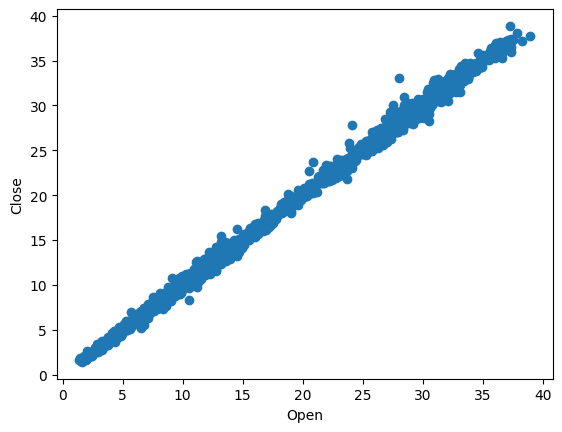

In [25]:
X_open = X[:, 0]  
plt.scatter(X_open, Y)
plt.ylabel('Close')
plt.xlabel('Open')
plt.show();


In [26]:
#nearly a perfect linear scatter plot. This was also obvious, given the %98 rate.

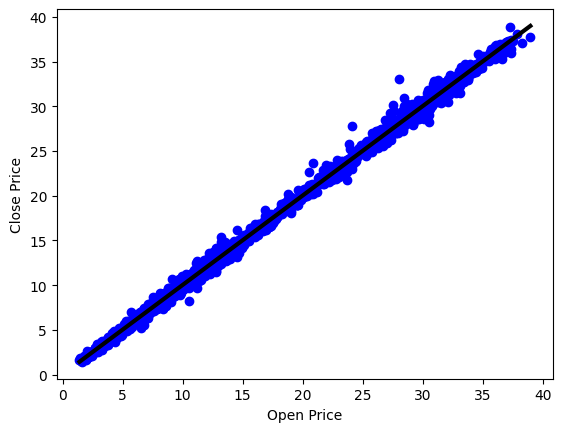

In [27]:
reg = LinearRegression()


X_open = X[:, 0].reshape(-1, 1)  
y = df['Close'].values  


reg.fit(X_open, y)


prediction_space = np.linspace(min(X_open), max(X_open)).reshape(-1, 1)


plt.scatter(X_open, y, color='blue')


plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)


plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

In [28]:
#with Least Squares Method, I drew a line to represent the relationship.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 0.18339746943767907


In [30]:
#The Root Mean Squared Error (RMSE) of 0.18 indicates that, on average, 
#the model's predicted values are off by only 0.18 units from the actual values. 
#This suggests that the model is performing quite well, 
#with a very small prediction error.

In [31]:
#With cross-validation I checked the performance of my algorithm.

In [32]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(reg_all, X, Y, cv=5)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))


[0.99335746 0.99615862 0.99803151 0.99871613 0.99485035]
Average 5-Fold CV Score: 0.9962228132715125


In [33]:
# Now in the unsupervised learning,I chose K-Means Algorithm

<Axes: title={'center': 'Close Prices Distribution Plot'}, xlabel='Close', ylabel='Density'>

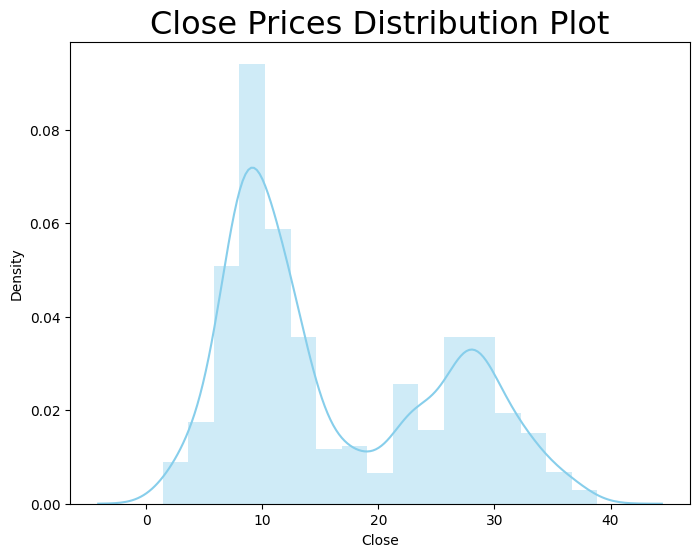

In [34]:
f0, ax = plt.subplots(figsize=(8, 6))
plt.title('Close Prices Distribution Plot',fontsize=23)
sns.distplot(df['Close'], color='skyblue')

In [35]:
# in this graph peaks represents common price levels.
# 10 is the common close price

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_dropped = df.drop('Close', axis=1)
X = df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)

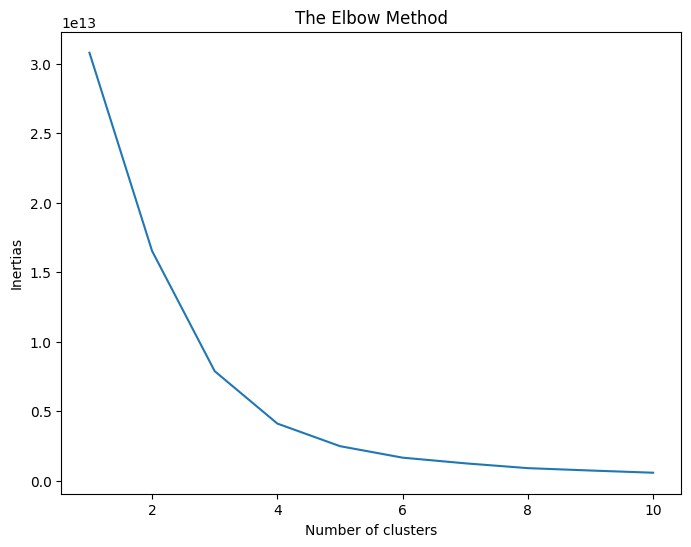

In [37]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [38]:
model = KMeans(n_clusters=3)
training_points = scaled_x[:1000]
test_points = scaled_x[1000:]
model.fit(training_points)
labels = model.predict(test_points)

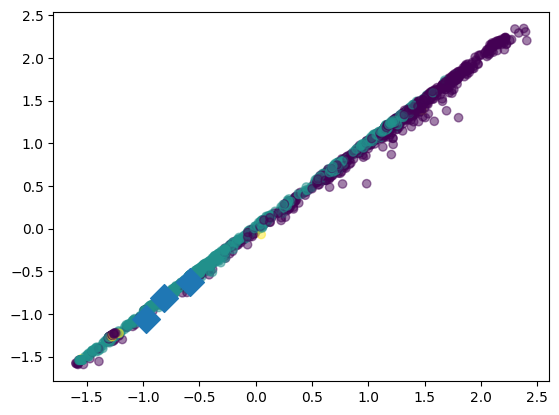

In [39]:
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)
centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [40]:
# I standardized the dataset (excluding the 'Close' column) to ensure 
#all features contribute equally to the K-Means algorithm. 
#I used the Elbow Method to determine the optimal number of clusters(which is three)
#by plotting inertia values for different cluster counts.

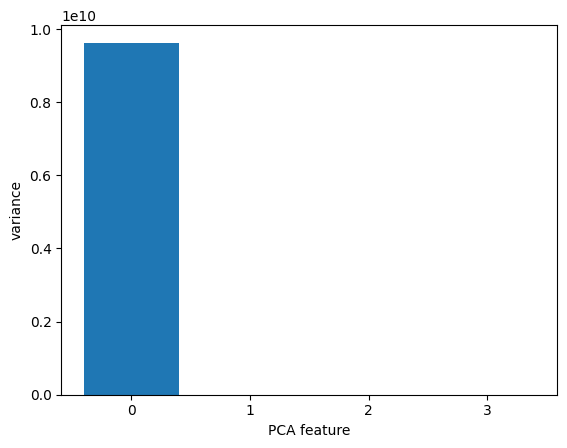

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [42]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[9.99999982e-01 1.79833117e-08]
0.9999999999938285


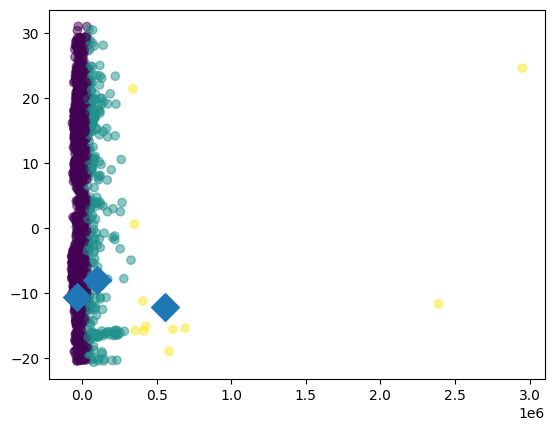

In [43]:
pca_features = pca.fit_transform(X)
model = KMeans(n_clusters=3)
training_points = pca_features[:1000]
test_points = pca_features[1000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

In [44]:
# I reduce the number of dimensions by using PCA.
# It looks like my dataset is actually 1 dimension
#but I chose the n_components to be 2, so the model does not give error trying to access test points more than 1
# When we set the number of components to 2, 
#we can retain approximately 99.8% of the total variance, 
#meaning almost all of it.

In [ ]:
# At this point, I decided to go with supervised learning because with financial datasets like this one, It is mostly easy to predict
# market's movements unless if some crisis occurs like in the 2009 and 2011

In [ ]:
# In the last part of my project, I'm going to assess my model through mean squared error, mean absolute error

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = reg_all.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)


Mean Squared Error:  0.033634631796144426
Mean Absolute Error:  0.13581805972077818


In [ ]:
# These values show that my regression model is performing well with minimal error